In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline  

from scipy import stats
#from sklearn import preprocessing,feature_selection
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV, LassoCV, LassoLarsCV,Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [4]:
from math import *

In [167]:
data=pd.read_csv('result.csv')

##### loading data

In [13]:
#loading data
data = pd.read_excel('result.xlsx')
data.shape

(8412, 7)

In [8]:
hn = table['hole_number'].value_counts().index.tolist()
hr = table['hole_radius'].value_counts().index.tolist()
dfc = table['distance_from_centre'].value_counts().index.tolist()
pr = table['pellet_radius'].value_counts().index.tolist()


hn_final = []
hr_final = []
dfc_final = []
max_f = []
min_f = []
max_f_fail = []
min_f_fail = []
pr_final = []
for pra in pr:
    for num in hn:
        for ra in hr:
            for dis in dfc:
                temp = table[table['hole_number']==num]
                temp = temp[temp['hole_radius']==ra]
                temp = temp[temp['distance_from_centre']==dis]
                temp = temp[temp['pellet_radius']==pra]
                if len(temp)!=0:
                    hn_final.append(num)
                    hr_final.append(ra)
                    dfc_final.append(dis)
                    pr_final.append(pra)
                    max_f.append(temp['force'].max())
                    max_f_fail.append(temp['max failure parameter'][temp["force"].idxmax()])
                    min_f.append(temp['force'].min())
                    min_f_fail.append(temp['max failure parameter'][temp["force"].idxmin()])   
                    
        

                    
data = pd.DataFrame({'pellet_radius':pr_final,'hole_number':hn_final,'hole_radius':hr_final,'distance_from_centre':dfc_final,
                            'maximum_load':max_f,'failure parameter at maximum_load':max_f_fail,
                             'minimum_load':min_f,'failure parameter at minimum_load':min_f_fail})

data = data.sort_values(['pellet_radius','hole_number', 'hole_radius','distance_from_centre'], ascending=[True, True, True,True])
data.reset_index(drop=True,inplace = True)

NameError: name 'pr' is not defined

In [17]:
data

,hole_number,hole_radius,distance_from_centre,maximum_load,failure parameter at maximum_load,minimum_load,failure parameter at minimum_load
0,9,0.008,0.072,97508.980152,1.000049,59761.334861,1.000057
1,9,0.008,0.080,43505.399568,1.000077,35470.642559,1.000043
2,9,0.008,0.048,169504.877061,1.000030,126159.267159,1.000035
3,9,0.008,0.088,18599.517053,1.000078,13494.769876,1.000080
4,9,0.008,0.040,153738.963408,1.000078,136524.290122,1.000058
...,...,...,...,...,...,...,...
317,8,0.012,0.048,196248.340728,1.000089,125807.729895,1.000053
318,8,0.012,0.084,294625.511395,1.000020,16882.310782,1.000015
319,8,0.015,0.060,164135.944304,1.000037,85519.428925,1.000022
320,8,0.015,0.075,184264.115823,1.000067,40195.090333,1.000053


In [19]:
hn_final

[9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [20]:
hn = data['hole_number'].value_counts().index.tolist()
hr = data['hole_radius'].value_counts().index.tolist()
dfc = data['distance_from_centre'].value_counts().index.tolist()



hn_final = []
hr_final = []
dfc_final = []
max_f = []
min_f = []
max_f_fail = []
min_f_fail = []


for num in hn:
    for ra in hr:
        for dis in dfc:
            temp = data[data['hole_number']==num]
            temp = temp[temp['hole_radius']==ra]
            temp = temp[temp['distance_from_centre']==dis]

            if len(temp)!=0:
                hn_final.append(num)
                hr_final.append(ra)
                dfc_final.append(dis)
                max_f.append(temp['force'].max())
                max_f_fail.append(temp['max failure parameter'][temp["force"].idxmax()])
                min_f.append(temp['force'].min())
                min_f_fail.append(temp['max failure parameter'][temp["force"].idxmin()])   
                    
        

                    
data = pd.DataFrame({'hole_number':hn_final,'hole_radius':hr_final,'distance_from_centre':dfc_final,
                            'maximum_load':max_f,'failure parameter at maximum_load':max_f_fail,
                             'minimum_load':min_f,'failure parameter at minimum_load':min_f_fail})

data = data.sort_values(['hole_number', 'hole_radius','distance_from_centre'], ascending=[True, True, True,True])
data.reset_index(drop=True,inplace = True)

KeyError: 'force'

In [ ]:
data

In [573]:
data.shape

(322, 7)

##### relativly small dataset 

##### creating columns : surface area and pellet_radius-hole_radius ratio

In [574]:
#creating columns: surface area and pellet_radius-hole_radius ratio
outer_radius = 0.1
data['surface_area'] = [outer_radius*2*np.pi+data['hole_number'][i]*data['hole_radius'][i]*2*np.pi for i in range(len(data))]
data['ratio pellet-hole'] = [outer_radius/data['hole_radius'][i] for i in range(len(data))]

In [575]:
data.columns

Index(['hole_number', 'hole_radius', 'distance_from_centre', 'maximum_load',
       'fail at maximum_load', 'minimum_load', 'fail at minimum_load',
       'surface_area', 'ratio pellet-hole'],
      dtype='object')

In [576]:
ar = 0.1 * pi/180

In [577]:
max_force = [ar*data['maximum_load'][i] for i in range(len(data))] 
min_force = [ar*data['minimum_load'][i] for i in range(len(data))] 
data['max_force']=max_force
data['min_force']=min_force

In [578]:
data.to_csv('temp.csv')

##### checking the correlation between py_max and other parameters

In [338]:
data.columns

Index(['hole_number', 'hole_radius', 'distance_from_centre', 'maximum_load',
       'fail at maximum_load', 'minimum_load', 'fail at minimum_load',
       'surface_area', 'ratio pellet-hole', 'max_force', 'min_force'],
      dtype='object')

In [478]:
data_corr = data.corr()['max_force'].sort_values(ascending=False).drop(['max_force','maximum_load','minimum_load','fail at minimum_load','fail at minimum_load','min_force'])
#data_corr = data.corr()['min_force'].sort_values(ascending=False).drop(['maximum_load','minimum_load','fail at minimum_load'])
data_corr.head(10)

distance_from_centre    0.050200
hole_radius             0.015683
fail at maximum_load   -0.007998
ratio pellet-hole      -0.031361
surface_area           -0.567105
hole_number            -0.687692
Name: max_force, dtype: float64

##### visualising the correlation

Index(['hole_number', 'hole_radius', 'distance_from_centre', 'maximum_load',
       'fail at maximum_load', 'minimum_load', 'fail at minimum_load',
       'surface_area', 'ratio pellet-hole', 'max_force', 'min_force'],
      dtype='object')

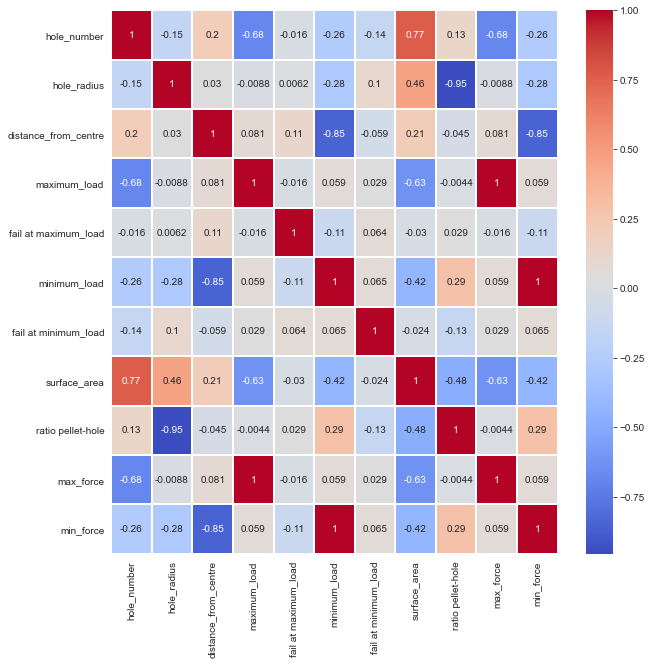

In [183]:
# most correlated features 
corrmat = data.corr()
#picking the top correlation features
top_corr_features = corrmat.index[abs(corrmat['max_force'])>0.0]
plt.figure(figsize=(10,10))
sns.heatmap(data[top_corr_features].corr(), cmap='coolwarm', annot=True, linewidths=2)
top_corr_features

##### selecting the potential useful columns

In [564]:
feature_names =  [ 'surface_area', 'hole_number','ratio pellet-hole','hole_radius','distance_from_centre']
#feature_names =  [ 'surface_area', 'ratio pellet-hole','distance_from_centre','hole_radius']
#feature_names =  [ 'surface_area','hole_number', 'ratio pellet-hole']
#feature_names =  [ 'surface_area', 'hole_number']
X = data[feature_names]
#picking specific columns
y = data.min_force

##### overview of py_max

In [1]:
#Descriptive statistics summary
data['min_force'].describe()

NameError: name 'data' is not defined

d:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_force', ylabel='Density'>

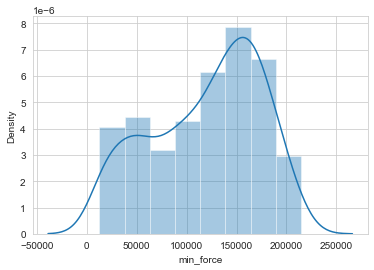

In [452]:
#histogram
sns.distplot(data['min_force'])

# Preprocessing data

In [ ]:
#rb for linear 
# sc for ridge

In [565]:
#split data
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 1)

In [506]:
# standarise the data or normalise
sc = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)

In [507]:
#def rmse_cv(model,X,y):
#    rmse= -cross_val_score(model,X,y, scoring="r2", cv = 50)
#    return(rmse).mean()

def rmse_cv(model,X,y):
    rmse= np.sqrt(-cross_val_score(model,X,y, scoring="neg_mean_squared_error", cv = 50))
    return(rmse).mean()

# Linear Model

##### quick application on the ordinary linear regression model

In [484]:
ln_model = LinearRegression()
ln_model.fit(train_X, train_y) 

LinearRegression()

In [485]:
# Predict
ln_val_predictions = ln_model.predict(val_X)
#check mae
ln_val_mae = mean_absolute_error(val_y,ln_val_predictions)
#print(.format(val_mae))
print('Validation MAE:  ',ln_val_mae)
print('Validation rmse:',rmse_cv(ln_model, X, y))
print('Validation r2_score:', r2_score(val_y,ln_val_predictions))

Validation MAE:   53689.448605835394
Validation rmse: 63066.10742771882
Validation r2_score: 0.4183137208733102


##### visualisation of alpha against the Ridge and Lasso Linear Regression 

##### range 1e-5 to 1

In [486]:
model = RidgeCV(alphas=[1e-5,5e-5,1e-4, 5e-4, 1e-3, 5e-3,1e-2,5e-2,1e-1,5e-1,10,50,100,200,500,800],cv=40)  # 通过RidgeCV可以设置多个参数值，算法使用交叉验证获取最佳参数值
model.fit(train_X, train_y)   # 线性回归建模
#print('系数矩阵:\n',model.coef_)
#print('线性回归模型:\n',model)
print('RidgeCV最佳alpha值',model.alpha_)  # 只有在使用RidgeCV算法时才有效
# 使用模型预测
predicted = model.predict(train_X)

model.score(val_X, val_y) 

RidgeCV最佳alpha值 100.0


0.46687344591494473

In [487]:
forest_model.score(val_X, val_y) 

ValueError: X has 3 features, but DecisionTreeRegressor is expecting 5 features as input.

In [441]:
decision_model.score(val_X,val_y)

0.7375260575600009

In [488]:
model = LassoCV(alphas=[1e-5,5e-5,1e-4, 5e-4, 1e-3, 5e-3,1e-2,5e-2,1e-1,5e-1,10,50,100,200,500,800],cv=40)  # 通过RidgeCV可以设置多个参数值，算法使用交叉验证获取最佳参数值
model.fit(train_X, train_y)   # 线性回归建模
#print('系数矩阵:\n',model.coef_)
#print('线性回归模型:\n',model)
print('LassoCV最佳alpha值',model.alpha_)  # 只有在使用RidgeCV算法时才有效
# 使用模型预测
predicted = model.predict(train_X)
 
model.score(val_X, val_y)

LassoCV最佳alpha值 200.0


0.4217182629501268

In [251]:
cv_Ridge

[0.17033901752452474,
 -0.9678756859731306,
 -2.9784971012985304,
 -5.79541715871829,
 -9.41943900831804,
 -13.850809356088293,
 -48.1204735971608]

In [257]:
#alphas = [1e-4, 5e-4, 1e-3, 5e-3]
#alphas = [1e-5,5e-5,1e-4, 5e-4, 1e-3, 5e-3,1e-2,5e-2,1e-1,5e-1,1]
#alphas = [1,10,20,30,40,50,100]
#alphas = [10,50,100,200,500,800]
#cv_Ridge = [r2_score(Ridge(alpha=alpha, max_iter=50000).fit(train_X, train_y).predict(train_X), train_y) for alpha in alphas]
#pd.Series(cv_Ridge, index = alphas).plot()

#cv_lasso = [r2_score(Lasso(alpha=alpha, max_iter=50000).fit(train_X, train_y).predict(train_X), train_y) for alpha in alphas]
#pd.Series(cv_lasso, index = alphas).plot()

#cv_ln = [rmse_cv(LinearRegression(),train_X, train_y) for alpha in alphas]
#pd.Series(cv_ln, index = alphas).plot()

#plt.plot(alphas,cv_Ridge,label = 'ridge')
#plt.plot(alphas,cv_lasso,label = 'lasso')
#plt.plot(alphas,cv_ln,label = 'ln')
#plt.legend()
#plt.show()

In [460]:
model_lasso = Lasso(alpha=10, max_iter=50000).fit(train_X, train_y)
model_ridge = Ridge(alpha=10, max_iter=50000).fit(train_X, train_y)

In [461]:
# Predict
ls_val_predictions = model_lasso.predict(val_X)
#check mae
ls_val_mae = mean_absolute_error(val_y,ls_val_predictions)
#print(.format(val_mae))
print('Lasso Validation MAE:  ',ls_val_mae)
print('Lasso Validation rmse:',rmse_cv(model_lasso, val_X, val_y))
print('Lasso Validation r2_score:', r2_score(val_y,ls_val_predictions))
print('--------------------------')
# Predict
rg_val_predictions = model_ridge.predict(val_X)
#check mae
rg_val_mae = mean_absolute_error(val_y,rg_val_predictions)
#print(.format(val_mae))
print('Ridge Validation MAE:  ',rg_val_mae)
print('Ridge Validation rmse:',rmse_cv(model_ridge, val_X, val_y))
print('Ridge Validation r2_score:', r2_score(val_y,rg_val_predictions))




Lasso Validation MAE:   21150.68722444568
Lasso Validation rmse: 23358.57601128527
Lasso Validation r2_score: 0.7622624141698523
--------------------------
Ridge Validation MAE:   21070.979006401296
Ridge Validation rmse: 23511.826152024685
Ridge Validation r2_score: 0.7684403896828023


# Tree Model

##### Decision Tree

In [524]:
#split data
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 1)
# standarise the data or normalise
sc = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()
#train_X = sc.fit_transform(train_X)
#val_X = sc.transform(val_X)

In [525]:
decision_model = DecisionTreeRegressor()  
decision_model.fit(train_X, train_y) 

DecisionTreeRegressor()

In [526]:
decision_model.score(val_X, val_y)

0.7485318831325045

In [527]:
# Predict
dt_val_predictions = decision_model.predict(val_X)
#check mae
dt_val_mae = mean_absolute_error(val_y,dt_val_predictions)
#print(.format(val_mae))
print('Decision Tree Validation MAE:  ',dt_val_mae)
print('Decision Tree Validation rmse:',rmse_cv(decision_model, val_X, val_y))
print('Decision Tree Validation r2_score:', r2_score(val_y,dt_val_predictions))

Decision Tree Validation MAE:   29704.339863700294
Decision Tree Validation rmse: 40782.86899408192
Decision Tree Validation r2_score: 0.7485318831325045


##### Random Forest Quick application

In [396]:
forest_model = RandomForestRegressor(bootstrap=True,
 max_depth=30,
 max_features='auto',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators=400)
forest_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=400)

In [469]:
decision_model.score(val_X, val_y)

0.8498811635098759

In [529]:
# max model
forest_model = RandomForestRegressor(
n_estimators=400,
min_samples_split= 5,
min_samples_leaf= 2,
max_features='auto',
max_depth=30,
bootstrap= True)
forest_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=400)

In [509]:
# min model
forest_model = RandomForestRegressor(
n_estimators=200,
min_samples_split=2,
min_samples_leaf=1,
max_features= 'auto',
max_depth=50,
bootstrap=True)
forest_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=50, n_estimators=200)

In [530]:
forest_model.score(val_X, val_y)

0.830493905828724

In [377]:
# Predict
rf_val_predictions = forest_model.predict(val_X)
#check mae
rf_val_mae = mean_absolute_error(val_y,rf_val_predictions)
#print(.format(val_mae))
print('Random Forest Validation MAE:  ',rf_val_mae)
print('Random Forest Validation rmse:',rmse_cv(forest_model, val_X, val_y))
print('Random Forest Validation r2_score:', r2_score(val_y,rf_val_predictions))

Random Forest Validation MAE:   26226.12862670267
Random Forest Validation rmse: 36258.09918267442
Random Forest Validation r2_score: 0.8274099077136441


##### Hyper-parameters tuning 

In [315]:
# Hyper parameter tuning
parameters = {
    'n_estimators':[10, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features':['auto', 'sqrt'],
    'bootstrap':[True, False]    
}

In [316]:
random_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters,
                                cv=5,
                               verbose=2)

In [465]:
random_cv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=parameters,
                               n_iter=50, cv=5,
                               verbose=2, random_state=0)

In [466]:
random_cv.fit(train_X, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estima

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, 

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   1.1s
[CV] END bootstrap=False, max_depth=30, max

[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   0.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   0.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   0.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   0.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   1.2s
[CV] END bootstrap=False, max_dept

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 200, 400, 600,
                                                         800, 1000, 1200, 1400,
                                                         1600, 1800, 2000]},
                   random_state=0, verbose=2)

In [467]:
random_cv.best_params_
#random_cv.best_estimator_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [312]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=400)

In [ ]:
#GS
RandomForestRegressor(bootstrap=True,
 max_depth=30,
 max_features='auto',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators=400)
#3
RandomForestRegressor(bootstrap=False, max_depth=60, n_estimators=600)

##### making predictions with the best parameters

In [539]:
feature_names =  [ 'surface_area', 'hole_number','ratio pellet-hole','hole_radius','distance_from_centre']
#feature_names =  [ 'surface_area','hole_radius', 'ratio pellet-hole']
#feature_names =  [ 'surface_area', 'hole_radius']
X = data[feature_names]
#picking specific columns
y = data.minimum_load
#split data
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 1)

In [540]:
train_X

,surface_area,hole_number,ratio pellet-hole,hole_radius,distance_from_centre
39,0.728849,2,12.500000,0.008,0.056
271,0.892212,7,16.666667,0.006,0.078
78,0.942478,2,4.000000,0.025,0.050
201,1.005310,5,8.333333,0.012,0.072
147,0.779115,4,16.666667,0.006,0.078
...,...,...,...,...,...
203,1.005310,5,8.333333,0.012,0.048
255,0.980177,7,12.500000,0.008,0.040
72,0.816814,2,6.666667,0.015,0.045
235,1.005310,6,10.000000,0.010,0.080


In [543]:
#LR
ln_model = LinearRegression()
ln_model.fit(train_X, train_y) 
ln_val_predictions = ln_model.predict(val_X)
print('Validation r2_score:', r2_score(val_y,ln_val_predictions))

Validation r2_score: 0.5665373693561725


In [544]:
#Ridge
rg_model = RidgeCV(alphas=[1e-5,5e-5,1e-4, 5e-4, 1e-3, 5e-3,1e-2,5e-2,1e-1,5e-1,10,50,100,200,500,800],cv=10)  # 通过RidgeCV可以设置多个参数值，算法使用交叉验证获取最佳参数值
rg_model.fit(train_X, train_y)   # 线性回归建模
print('交叉验证最佳alpha值',rg_model.alpha_)  # 只有在使用RidgeCV算法时才有效
predicted = rg_model.predict(train_X)
rg_model.score(val_X, val_y)


交叉验证最佳alpha值 10.0


0.5688302173840298

In [545]:
#Lasso
ls_model = LassoCV(alphas=[1e-5,5e-5,1e-4, 5e-4, 1e-3, 5e-3,1e-2,5e-2,1e-1,5e-1,10,50,100,200,500,800],cv=10)  # 通过RidgeCV可以设置多个参数值，算法使用交叉验证获取最佳参数值
ls_model.fit(train_X, train_y)   # 线性回归建模
print('交叉验证最佳alpha值',ls_model.alpha_)  # 只有在使用RidgeCV算法时才有效
predicted = ls_model.predict(train_X)
ls_model.score(val_X, val_y)

交叉验证最佳alpha值 800.0


0.5665468644351428

In [420]:
#model_lasso = Lasso(alpha=800, max_iter=50000).fit(train_X, train_y)
#model_ridge = Ridge(alpha=0.5, max_iter=50000).fit(train_X, train_y)
#predicted_ls = ls_model.predict(val_X)
#predicted_rg = rg_model.predict(val_X)
#print('Lasso',r2_score(val_y,predicted_ls))
#print('Ridge',r2_score(val_y,predicted_rg))

In [135]:
scoring = make_scorer(r2_score)

NameError: name 'make_scorer' is not defined

In [145]:
g_cv.best_params_

{'min_samples_split': 2}

In [146]:
g_cv = GridSearchCV(DecisionTreeRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=r2_score, cv=5, refit=True)

g_cv.fit(train_X, train_y)
g_cv.best_params_

result = g_cv.cv_results_
# print(result)
#r2_score(val_y,dt_val_predictions)
r2_score(val_y, g_cv.best_estimator_.predict(val_X))

d:\python\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=150    214331.204530
123    261975.156431
163    224025.110897
108    238938.813002
158    212040.885992
207    198725.080542
161    174362.482890
130    278007.386193
116    201707.820963
73     569330.577837
14     104236.125066
138    191587.808820
122    282055.391050
56     304718.891927
186    121077.955799
55     391671.101518
88     290710.664593
53     333481.031700
152    208179.302411
151    210895.726723
191    120598.586803
105    247141.349159
42     275131.172216
17      94744.618941
5      110404.006150
159    190495.912773
198    245649.978949
48     216648.154678
174    198432.132822
66     686722.718688
172    150926.665297
90     235689.756472
54     336570.298564
Name: max_force, dtype: float64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.8670100854393165

In [143]:
#DT
decision_model = DecisionTreeRegressor()  
decision_model.fit(train_X, train_y) 
dt_val_predictions = decision_model.predict(val_X)
print('Decision Tree Validation r2_score:', r2_score(val_y,dt_val_predictions))

Decision Tree Validation r2_score: 0.8759816812372956


In [131]:
## making predictions using the Random Forest algorithm 
forest_model = RandomForestRegressor(max_depth=60, min_samples_split=5, n_estimators=400)
forest_model.fit(train_X, train_y)
rf_val_predictions = forest_model.predict(val_X)
print('Random Forest Validation r2_score:', r2_score(val_y,rf_val_predictions))

Random Forest Validation r2_score: 0.8448364641212568


In [ ]:
param_test1 = {'n_estimators':range(10,71,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [423]:
random_cv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=parameters,
                               n_iter=50, cv=5,
                               verbose=2, random_state=0)
random_cv.fit(train_X, train_y)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estima

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, 

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max

[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   0.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   0.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   0.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   0.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   1.3s
[CV] END bootstrap=False, max_dept

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=400)

In [49]:
forest_model = RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=400)
forest_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=400)

In [132]:
forest_model = RandomForestRegressor(max_depth=60, min_samples_split=5, n_estimators=400)
forest_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=60, min_samples_split=5, n_estimators=400)

In [133]:
forest_model.fit(train_X, train_y)
rf_val_predictions = forest_model.predict(val_X)

print('Random Forest Validation r2_score:', r2_score(val_y,rf_val_predictions))

Random Forest Validation r2_score: 0.8483946411455049


In [60]:
forest_model = RandomForestRegressor(max_depth=50, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)
forest_model.fit(train_X, train_y)
# Predict
rf_val_predictions = forest_model.predict(val_X)

print('Random Forest Validation r2_score:', r2_score(val_y,rf_val_predictions))

Random Forest Validation r2_score: 0.7958887877203014


In [319]:
## making predictions using the Random Forest algorithm 

lasso_model = Lasso(alpha = 1e-4, max_iter=50000)
lasso_model.fit(train_X, train_y)
predicted_lasso = lasso_model.predict(val_X)
print("Mean Absolute Error using Random Forest:", mean_absolute_error(val_y, predicted_lasso))

Mean Absolute Error using Random Forest: 27995626.057527985


In [174]:
## making predictions using the Random Forest algorithm 

ridge_model = Ridge(alpha = 1e-4, max_iter=50000)
ridge_model.fit(train_X, train_y)
predicted_ridge = ridge_model.predict(val_X)
print("Mean Absolute Error using Random Forest:", mean_absolute_error(val_y, predicted_ridge))

Mean Absolute Error using Random Forest: 27995625.940784555


In [164]:
print('Linear Regression Validation MAE:  ',ln_val_mae)
print('Lasso Validation MAE:  ',ls_val_mae)
print('Ridge Validation MAE:  ',rg_val_mae)
print('Decision Tree Validation MAE:  ',dt_val_mae)
print('Random Forest Validation MAE:  ',rf_val_mae)
print('----------------------------------------')


print('Linear Regression Validation rmse:',rmse_cv(ln_model, val_X, val_y))
print('Lasso Validation rmse:',rmse_cv(model_lasso, val_X, val_y))
print('Ridge Validation rmse:',rmse_cv(model_ridge, val_X, val_y))
print('Decision Tree Validation rmse:',rmse_cv(decision_model, val_X, val_y))
print('Random Forest Validation rmse:',rmse_cv(forest_model, val_X, val_y))
print('----------------------------------------')

print('Linear Regression Validation r2_score:', r2_score(val_y,ln_val_predictions))
print('Lasso Validation r2_score:', r2_score(val_y,ls_val_predictions))
print('Ridge Validation r2_score:', r2_score(val_y,rg_val_predictions))
print('Decision Tree Validation r2_score:', r2_score(val_y,dt_val_predictions))
print('Random Forest Validation r2_score:', r2_score(val_y,rf_val_predictions))

Linear Regression Validation MAE:   57633.93758045159
Lasso Validation MAE:   57557.435483359826
Ridge Validation MAE:   57530.79825148515
Decision Tree Validation MAE:   29391.372106775358
Random Forest Validation MAE:   30475.98001798013
----------------------------------------
Linear Regression Validation rmse: 64256.70366256301
Lasso Validation rmse: 64188.420690541556
Ridge Validation rmse: 63608.06542431424
Decision Tree Validation rmse: 54881.05336611545
Random Forest Validation rmse: 48778.56001620973
----------------------------------------
Linear Regression Validation r2_score: 0.5018371812849249
Lasso Validation r2_score: 0.5032351540498337
Ridge Validation r2_score: 0.5050068729942518
Decision Tree Validation r2_score: 0.8736089106241812
Random Forest Validation r2_score: 0.8483946411455049


In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

##### Selecting the final model

In [ ]:
#SA+PHR+HN
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
#SA+HN
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)

In [244]:
my_model = forest_model

In [246]:
hole_number = 2
outer_radius = 10
hole_radius = 1
distance_from_centre = 3
sf_area = outer_radius*2*np.pi+hole_number*hole_radius*2*np.pi
pellet_hole = outer_radius/hole_radius

xx = [[ sf_area,hole_number,pellet_hole]]
y_pred = my_model.predict(xx)
print('The predicted value for the maximum load is: ',y_pred[0])

The predicted value for the maximum load is:  227539062.5


In [52]:
#maximum
forest_model = RandomForestRegressor(max_depth=50, n_estimators=200)

In [289]:
(205078125-191439992.40099105)/1e8

0.13638132599008948

In [41]:
feature_names =  [ 'surface_area', 'hole_number','ratio pellet-hole','hole_radius','distance_from_centre']


In [ ]:
hole_number = 2
outer_radius = 10
hole_radius = 1
distance_from_centre = 3
sf_area = outer_radius*2*np.pi+hole_number*hole_radius*2*np.pi
pellet_hole = outer_radius/hole_radius

In [ ]:
pi

In [1]:
from math import pi, cos,sin

In [21]:
outer_radius = 10
surface_area = 100
residual = surface_area/(2*pi)-outer_radius
#hole_radius= outer_radius/10
d_from_c = 2*hole_radius
hole_number = 2

In [22]:
residual

5.915494309189533

In [25]:
h = 2
while residual/h>outer_radius/10:
    print(h)
    h+=1

2
3
4
5


In [ ]:
if negative
print(falsae)

In [18]:
hole_radius_list = []
distance_list = []
hole_number_list = []
ratio_list = []

while True:
    while hole_radius+d_from_c<outer_radius:
        residual_angle = (180-(360/hole_number))/2
        cc_distance = d_from_c*cos(residual_angle*pi/180)*2
        if 2*hole_radius<cc_distance:
            
            hole_radius_list.append(hole_radius)
            distance_list.append(d_from_c)
            hole_number_list.append(hole_number)
            ratio_list.append(outer_radius/hole_radius)

        d_from_c+=hole_radius

    hole_number+=1
    d_from_c=hole_radius*2
    residual_angle = (180-(360/hole_number))/2

    while 2.1*hole_radius>=(d_from_c*cos(residual_angle*pi/180)*2):
        d_from_c+=hole_radius

    if hole_radius+d_from_c>outer_radius:
        break
surface_area_list = [surface_area]*len(hole_number_list)

In [14]:
hole_number_list

[]

In [ ]:
from math import 

In [531]:
# max model
max_forest_model = RandomForestRegressor(
n_estimators=400,
min_samples_split= 5,
min_samples_leaf= 2,
max_features='auto',
max_depth=30,
bootstrap= True)
max_forest_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=400)

In [566]:
# min model
min_forest_model = RandomForestRegressor(
n_estimators=200,
min_samples_split=2,
min_samples_leaf=1,
max_features= 'auto',
max_depth=50,
bootstrap=True)
min_forest_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=50, n_estimators=200)

In [567]:
min_forest_model.score(val_X, val_y)

0.9209161355617415

In [63]:
forest_model.fit(train_X, train_y)
rf_val_predictions = forest_model.predict(val_X)

print('Random Forest Validation r2_score:', r2_score(val_y,rf_val_predictions))

Random Forest Validation r2_score: 0.8078806099444926


In [532]:
import pickle

max_model = "max_model.pkl"

with open(max_model, 'wb') as file:
    pickle.dump(max_forest_model, file)

In [568]:
min_model = "min_model.pkl"

with open(min_model, 'wb') as file:
    pickle.dump(min_forest_model, file)

In [569]:
with open("min_model.pkl", 'rb') as file:  
    min_rf_model = pickle.load(file)

min_rf_model

RandomForestRegressor(max_depth=50, n_estimators=200)

In [557]:
min_rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [547]:
from math import *

In [558]:
R = 0.1
r = 0.018
hn = 2
dis = 0.036
sf = 2*pi*(R+r*hn)
rph = R/r

In [570]:
min_rf_model.predict(xx)[0]

170548.436734511

In [563]:
213119506.835937/99755859.375

2.1364109153206017

In [562]:
9975585.9375*pi/180

174106.81942502025

In [560]:
xx = pd.DataFrame({'surface_area':[sf],'hole_number':[hn],
                   'ratio pellet_hole':[rph],'hole_radius':[r],
                  'distance_from_centre':[dis]})

In [546]:
val_X

,surface_area,hole_number,ratio pellet-hole,hole_radius,distance_from_centre
262,0.892212,7,16.666667,0.006,0.048
174,0.879646,5,12.500000,0.008,0.080
157,0.929911,4,8.333333,0.012,0.072
246,1.193805,6,6.666667,0.015,0.075
150,0.879646,4,10.000000,0.010,0.060
...,...,...,...,...,...
41,0.728849,2,12.500000,0.008,0.016
127,0.829380,4,12.500000,0.008,0.080
260,0.892212,7,16.666667,0.006,0.072
217,0.929911,6,12.500000,0.008,0.064


In [538]:
train_X

KeyError: 0

In [ ]:
'surface_area', 'hole_number','ratio pellet-hole','hole_radius','distance_from_centre'

In [474]:
X

,surface_area,hole_number,ratio pellet-hole,hole_radius,distance_from_centre
0,1.080708,9,12.500000,0.008,0.072
1,1.080708,9,12.500000,0.008,0.080
2,1.080708,9,12.500000,0.008,0.048
3,1.080708,9,12.500000,0.008,0.088
4,1.080708,9,12.500000,0.008,0.040
...,...,...,...,...,...
317,1.231504,8,8.333333,0.012,0.048
318,1.231504,8,8.333333,0.012,0.084
319,1.382301,8,6.666667,0.015,0.060
320,1.382301,8,6.666667,0.015,0.075


In [ ]:
with open(Pkl_Filename, 'rb') as file:  
    load_rf_model = pickle.load(file)

load_rf_model

In [86]:
x = input('Please Enter number: ')
print(x)
print(type(3))
print(int(x)==3)

Please Enter number: 3
3
<class 'int'>
True


In [88]:
x = input('Please Enter the outer_radius(in m): ')
type(x)

Please Enter the outer_radius(in m): 1


str

In [ ]:
for i in range(number_of_holes):

                        width_s = d_from_c*cos(angle*i+angle_step*pi/180)
                        height_s = d_from_c*sin(angle*i+angle_step*pi/180)

                        # print((angle*i+angle_step*angle_contact))
                        # centre
                        gmsh.model.geo.addPoint(
                            width_s, height_s, 0, mesh_size, 6+i*j)
                            # rr*cos(angle*i), rr*sin(angle*i), 0, 0.1, 6+i*j)
                        # four points in the circle
                        gmsh.model.geo.addPoint(width_s+hole_radius/sqrt(2),
                                                height_s+hole_radius/sqrt(2), 0, mesh_size, 7+i*j)
                        gmsh.model.geo.addPoint(width_s-hole_radius/sqrt(2),
                                                height_s-hole_radius/sqrt(2), 0, mesh_size, 8+i*j)
                        gmsh.model.geo.addPoint(width_s-hole_radius/sqrt(2),
                                                height_s+hole_radius/sqrt(2),  0, mesh_size, 9+i*j)
                        gmsh.model.geo.addPoint(width_s+hole_radius/sqrt(2),
                                                height_s-hole_radius/sqrt(2),  0, mesh_size, 10+i*j)

                        gmsh.model.geo.addCircleArc(9+i*j, 6+i*j, 7+i*j, 6+i*j)
                        gmsh.model.geo.addCircleArc(
                            7+i*j, 6+i*j, 10+i*j, 7+i*j)
                        gmsh.model.geo.addCircleArc(
                            10+i*j, 6+i*j, 8+i*j, 8+i*j)
                        gmsh.model.geo.addCircleArc(8+i*j, 6+i*j, 9+i*j, 9+i*j)

                        gmsh.model.geo.addCurveLoop(
                            [9+i*j, 6+i*j, 7+i*j, 8+i*j], 2+i)
                        n_element.append(2+i)

                    gmsh.model.geo.addPlaneSurface(n_element, 1)
                    gmsh.model.geo.synchronize()

                    # BC on top and bottom arcs
                    gmsh.model.addPhysicalGroup(1, [1], 5)
                    gmsh.model.addPhysicalGroup(1, [3], 6)
                    ps = gmsh.model.addPhysicalGroup(2, [1])
                    gmsh.model.setPhysicalName(2, ps, "PunchedDom")

                    # generate a 2D mesh
                    gmsh.model.mesh.generate(2)
                    # name and save
                    
                    if number_of_holes<10:
                        nu = '0'+str(number_of_holes)
                    if angle_step>=100:
                        an = str(angle_step)
                    elif angle_step>=10:
                        an = '0'+str(angle_step)
                    else:
                        an = '000'
                    
                    dfc_length = len(str(d_from_c))
                    if dfc_length<5:
                        d_f_c = str(d_from_c)+'0'*(5-dfc_length)
                    else:
                        d_f_c = str(d_from_c)
                    
                    
                    # if d_from_c%0.01<0.01:
                    #    d_f_c = str(d_from_c)+'0'
                    # else:
                    #    d_f_c = str(d_from_c)
                    
                    hr = str(float(hole_radius))
                    
                    name = nu+' hole_r='+hr+'_dfc'+d_f_c+'_'+an+' degree.msh'
                    
                    # name = str(number_of_holes)+' hole_r='+str(hole_radius)+'_dfc='+str(d_from_c)+'_'+str(int(angle_step))+" degree.msh"

                    mesh_list.append(name)

                    gmsh.write(name)

                    # if number_of_holes>=3:
                    #    if d_from_c>=0.07:
                    #        if '-nopopup' not in sys.argv:
                    #            gmsh.fltk.run()
                    gmsh.finalize()
                    print(name)

In [73]:
a = '100 hr=0.010200_dfc0.1_140 degree.msh'

In [30]:
from math import sin,cos, pi,sqrt

In [33]:
hole_radius = 0.012379
outer_radius = 0.1
d_from_c = hole_radius*2
angle_range = [10*i for i in range(18)]

In [45]:
number_of_holes=2
while True:
    while 1.5*hole_radius+d_from_c <= outer_radius:
        residual_angle = (180-(360/number_of_holes))/2
        cc_distance = d_from_c*cos(residual_angle*pi/180)*2
        if 2.5*hole_radius <= cc_distance:
            # Creating different arc with different bearing in order to simulate the compression test from differnet direction
            for angle_step in angle_range:

                if angle_step>=100:
                    an = str(angle_step)
                elif angle_step>=10:
                    an = '0'+str(angle_step)
                else:
                    an = '000'

                hr = str(float(hole_radius))
                d_f_c = str(d_from_c)

                name = str(number_of_holes)+' hr='+hr+'_dfc'+d_f_c+'_'+an+' degree.msh'
                print(name)

        d_from_c+=hole_radius


    number_of_holes+=1
    d_from_c=hole_radius*2
    d_from_c = round(d_from_c,3)
    residual_angle = (180-(360/number_of_holes))/2

    while 2.5*hole_radius>=(d_from_c*cos(residual_angle*pi/180)*2):
        d_from_c+=hole_radius
        d_from_c = round(d_from_c,3)

    if hole_radius+d_from_c>=outer_radius:
        break

3 hr=0.012379_dfc0.025_000 degree.msh
3 hr=0.012379_dfc0.025_010 degree.msh
3 hr=0.012379_dfc0.025_020 degree.msh
3 hr=0.012379_dfc0.025_030 degree.msh
3 hr=0.012379_dfc0.025_040 degree.msh
3 hr=0.012379_dfc0.025_050 degree.msh
3 hr=0.012379_dfc0.025_060 degree.msh
3 hr=0.012379_dfc0.025_070 degree.msh
3 hr=0.012379_dfc0.025_080 degree.msh
3 hr=0.012379_dfc0.025_090 degree.msh
3 hr=0.012379_dfc0.025_100 degree.msh
3 hr=0.012379_dfc0.025_110 degree.msh
3 hr=0.012379_dfc0.025_120 degree.msh
3 hr=0.012379_dfc0.025_130 degree.msh
3 hr=0.012379_dfc0.025_140 degree.msh
3 hr=0.012379_dfc0.025_150 degree.msh
3 hr=0.012379_dfc0.025_160 degree.msh
3 hr=0.012379_dfc0.025_170 degree.msh
3 hr=0.012379_dfc0.037379_000 degree.msh
3 hr=0.012379_dfc0.037379_010 degree.msh
3 hr=0.012379_dfc0.037379_020 degree.msh
3 hr=0.012379_dfc0.037379_030 degree.msh
3 hr=0.012379_dfc0.037379_040 degree.msh
3 hr=0.012379_dfc0.037379_050 degree.msh
3 hr=0.012379_dfc0.037379_060 degree.msh
3 hr=0.012379_dfc0.037379_070